In [1]:
import random

def jedno_bacanje():
    kockica_1 = random.randint(1, 6)
    kockica_2 = random.randint(1, 6)
    return kockica_1 + kockica_2

def bacanje_kockica(broj_bacanja):
    popis_rezultata_bacanja=[]
    for i in range(broj_bacanja):
        rezultat_bacanja = jedno_bacanje()
        popis_rezultata_bacanja.append(rezultat_bacanja)
    return popis_rezultata_bacanja

def lista_dobivenih_brojeva_bacanjem(popis_rezultata_bacanja):
    lista_dobivenih_bacanja=[]
    for i in range(2,13):
        lista_dobivenih_bacanja.append(popis_rezultata_bacanja.count(i))
    
    return lista_dobivenih_bacanja

In [2]:
import pandas as pd

tablica_bacanja_kockica = pd.DataFrame(index=['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
tablica_bacanja_kockica['Broj dobivenih bacanja'] = lista_dobivenih_brojeva_bacanjem(bacanje_kockica(10000))
tablica_bacanja_kockica['Broj kombinacija'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
tablica_bacanja_kockica['Postotak dobivenih bacanja'] = tablica_bacanja_kockica['Broj dobivenih bacanja']/100
tablica_bacanja_kockica['Postotak kombinacija'] = tablica_bacanja_kockica['Broj kombinacija']/36*100
tablica_bacanja_kockica

,Broj dobivenih bacanja,Broj kombinacija,Postotak dobivenih bacanja,Postotak kombinacija
2,281,1,2.81,2.777778
3,566,2,5.66,5.555556
4,814,3,8.14,8.333333
5,1024,4,10.24,11.111111
6,1435,5,14.35,13.888889
7,1648,6,16.48,16.666667
8,1360,5,13.60,13.888889
9,1148,4,11.48,11.111111
10,866,3,8.66,8.333333
11,583,2,5.83,5.555556


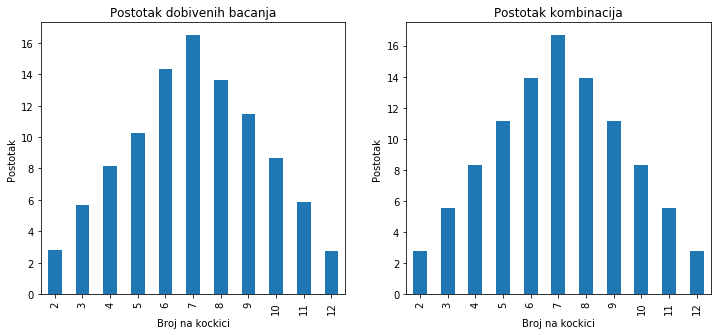

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Postotak dobivenih bacanja')
ax2.set_title('Postotak kombinacija')
ax1.set_xlabel('Broj na kockici')
ax2.set_xlabel('Broj na kockici')
ax1.set_ylabel('Postotak')
ax2.set_ylabel('Postotak')
tablica_bacanja_kockica['Postotak dobivenih bacanja'].plot(kind='bar', ax=ax1, figsize=(12,5))
tablica_bacanja_kockica['Postotak kombinacija'].plot(kind='bar', ax=ax2, figsize=(12,5))
plt.show()


In [4]:
monopoly_board = pd.read_csv('monopoly_board.csv', encoding='utf-8')

In [5]:
del monopoly_board['Space'], monopoly_board['Position'], monopoly_board['Price'], monopoly_board['PriceBuild'], monopoly_board['Rent'], monopoly_board['RentBuild1'], monopoly_board['RentBuild2'], monopoly_board['RentBuild3'], monopoly_board['RentBuild4'], monopoly_board['RentBuild5'], monopoly_board['Number']

Recimo 40 bacanja za partiju od četvero ljudi

In [6]:
lista_koji_put_na_polju=[]
for i in range(40):
    lista_koji_put_na_polju.append(0)

In [7]:
trenutno_mjesto=0
for i in range(40):
    trenutno_mjesto = trenutno_mjesto+jedno_bacanje()
    if trenutno_mjesto>39:
        trenutno_mjesto % 39
    lista_koji_put_na_polju[4] + 1

Jedna partija je odprilike 40 bacanja jednog igrača. Ponovimo to 1000 puta da vidimo na koje bolje bi najčešće stali igrači.

In [8]:
import numpy as np

najcesce_polje = np.empty(40, dtype=np.int32)
najcesce_polje.fill(0)

for i in range(10000):
    trenutno_mjesto=0
    for j in range(40):
        trenutno_mjesto = trenutno_mjesto+jedno_bacanje()
        if trenutno_mjesto>39:
            trenutno_mjesto = trenutno_mjesto % 40
        najcesce_polje[trenutno_mjesto] = najcesce_polje[trenutno_mjesto] + 1


In [9]:
najcesce_polje

array([ 9408,  9261,  9625,  9873,  9970, 10528, 10541, 11056, 10816,
       10513, 10546, 10217, 10219, 10153, 10218, 10372, 10395, 10306,
       10211, 10157, 10043, 10025, 10089,  9912,  9930,  9965,  9800,
        9896,  9844,  9712,  9811,  9766,  9931,  9671,  9477,  9653,
        9573,  9564,  9300,  9653])

No, u monopolyju postoje različiti načini za doć na neko polje osim random bacanja kockica, pa uzmimo sad i to u obzir.

In [10]:
def chance_cards(pozicija):
    random_broj = random.randint(1, 16)
    
    #Advance to "Go"
    if random_broj == 1:
        pozicija = 0
    #Advance to Illinois Ave.
    if random_broj == 2:
        pozicija = 24
    #Advance to St. Charles Place
    if random_broj == 3:
        pozicija = 11
    #Advance token to nearest Utility
    if random_broj == 4:
        if pozicija == 7: pozicija = 15
        if pozicija == 22: pozicija = 25
        if pozicija == 36: pozicija = 5
    #Advance token to the nearest Railroad
    if random_broj == 5:
        if pozicija == 7: pozicija = 12
        if pozicija == 22: pozicija = 28
    #Go Back Three {3} Spaces
    if random_broj == 6:
        pozicija = pozicija - 3
    #Go to Jail. Go directly to Jail
    if random_broj == 7:
        pozicija = 30
    #Take a trip to Reading Railroad
    if random_broj == 8:
        pozicija = 5
    #Take a walk on the Boardwalk. Advance token to Boardwalk.
    if random_broj == 9:
        pozicija = 39
    
    return pozicija

def chest_cards(pozicija):
    random_broj = random.randint(1, 16)
    
    #Advance to "Go"
    if random_broj == 1:
        pozicija = 0
    #Go to Jail
    if random_broj == 2:
        pozicija = 30
    
    return pozicija            

In [11]:
najcesce_polje_napredno = np.empty(40, dtype=np.int32)
najcesce_polje_napredno.fill(0)

for i in range(10000):
    trenutno_mjesto=0
    dva_ista=0
    for j in range(50):
        #ako smo završili u zatvoru, krećemo dalje s drugog mjesta
        if trenutno_mjesto == 30:
            trenutno_mjesto = 10
            #također, češće ćemo iz zatvora izać sa parnim brojevima, imamo 3 bacanja
            for k in range(3):
                kockica_1 = random.randint(1, 6)
                kockica_2 = random.randint(1, 6)
                if kockica_1 == kockica_2:
                    trenutno_mjesto = trenutno_mjesto + kockica_1 + kockica_2
                    if trenutno_mjesto > 39:
                        trenutno_mjesto = trenutno_mjesto % 40
                    najcesce_polje_napredno[trenutno_mjesto] = najcesce_polje_napredno[trenutno_mjesto] + 1
                    break
            
        #bacanje kockica, 3 puta za redom 2 ista broja, idemo u zatvor
        kockica_1 = random.randint(1, 6)
        kockica_2 = random.randint(1, 6)
        if kockica_1 == kockica_2:
            dva_ista = dva_ista + 1
        else: dva_ista = 0
        
        if dva_ista == 3:
            dva_ista = 0
            trenutno_mjesto = 30
        else:
            #pomičemo se onoliko koliko dobijemo na bacanju
            trenutno_mjesto = trenutno_mjesto + kockica_1 + kockica_2
        
        #ako smo prošli start
        if trenutno_mjesto > 39:
            trenutno_mjesto = trenutno_mjesto % 40
            
        #ako smo stali na Chance
        if trenutno_mjesto == 7 or trenutno_mjesto == 22 or trenutno_mjesto == 36:
            trenutno_mjesto = chance_cards(trenutno_mjesto)
            
        #ako smo stali na Chest
        if trenutno_mjesto == 2 or trenutno_mjesto == 17 or trenutno_mjesto == 33:
            trenutno_mjesto = chest_cards(trenutno_mjesto)
        
        najcesce_polje_napredno[trenutno_mjesto] = najcesce_polje_napredno[trenutno_mjesto] + 1
        
najcesce_polje_napredno

array([15085, 10344,  9398, 10958, 12154, 14886, 12466,  5678, 12447,
       12591, 12141, 14218, 14176, 11809, 13517, 13661, 14851, 12401,
       15395, 14910, 15246, 13832,  7333, 13409, 16089, 14380, 13556,
       13479, 13729, 12960, 19803, 13242, 12850, 11762, 12043, 11680,
        5667, 10552, 10613, 12806])

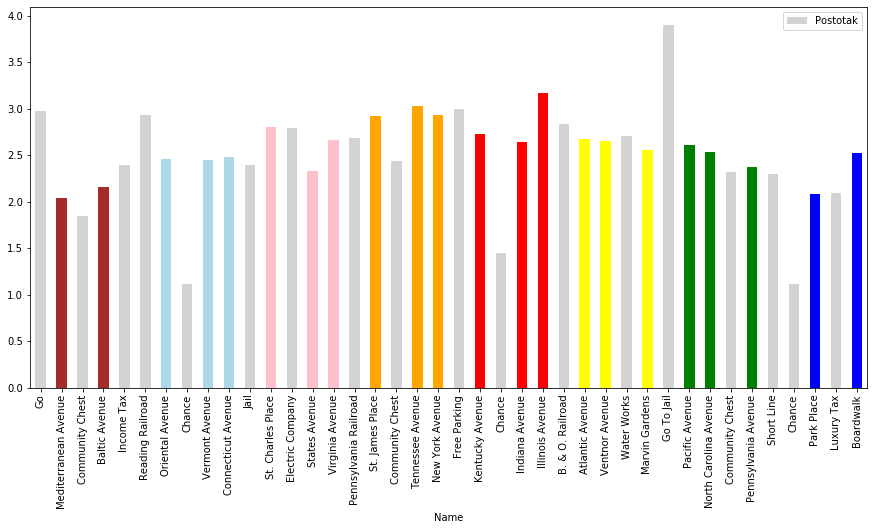

In [12]:
monopoly_board['x-puta'] = najcesce_polje_napredno
monopoly_board['Postotak'] = monopoly_board['x-puta']/monopoly_board['x-puta'].sum()*100
monopoly_board['Color'] = monopoly_board['Color'].replace('None', 'lightgray')

ax3 = monopoly_board.plot.bar(x='Name', y='Postotak', figsize=(15,7), color=monopoly_board['Color'])

Na polju 30 (Jail) nismo nikad na kraju kruga, ali ovako piše da razlikujemo Jail i Free Pass.